In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
birds_data = pd.read_csv('_datasets/bird_tracking.csv')
birds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [3]:
birds_data.head()
#birds_data.bird_name.value_counts()
#pd.unique(birds_data.bird_name)

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


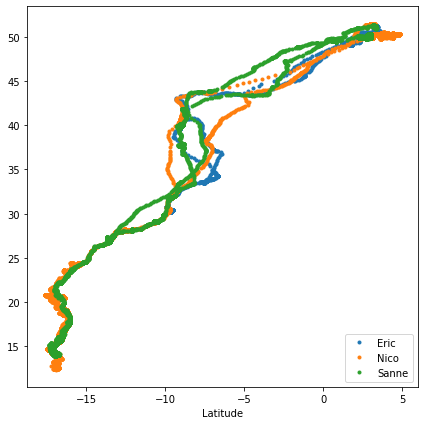

In [4]:
birds_name = pd.unique(birds_data.bird_name)
plt.figure(figsize=(7,7))

for bird_name in birds_name:
    ix = (birds_data.bird_name == bird_name)
    x, y = birds_data.longitude[ix], birds_data.latitude[ix]
    plt.plot(x, y, ".", label=bird_name)

plt.xlabel("Longitude")
plt.xlabel("Latitude")
plt.legend(loc="lower right")
plt.show()

In [5]:
import datetime
#Example to convert "datetime" to "datetime object"
date_str = birds_data.date_time[0] #type str
#convert to datetime OBJECT
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [6]:
# creating column timestamp
timestamps = []
for k in range(len(birds_data)):
    timestamps.append(datetime.datetime.strptime\
                     (birds_data.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

birds_data['timestamp'] = pd.Series(timestamps, index = birds_data.index)

#calculating elapsed days
data = birds_data[birds_data.bird_name == 'Eric']
times = data.timestamp #column timestamp to calculate the speed
# time elapsed: from the first half
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

elapsed_days

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

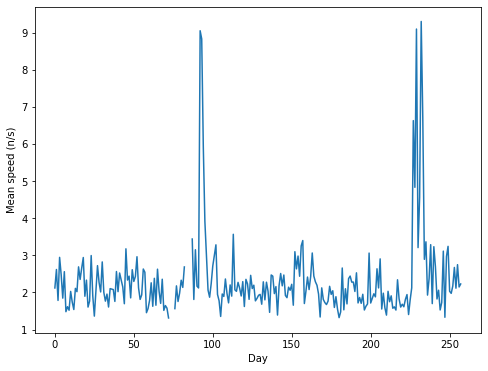

In [7]:
#Calculating Daily Mean Speed
next_day = 1
inds = []
daily_mean_speed = []

#check which day each timestamp is, and compute mean speed of the day
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (n/s)");
plt.show()
#plt.savefig("mean-speed-birds.pdf")

In [8]:
data_sanne = birds_data[birds_data.bird_name == 'Sanne']
data_sanne['timestamp'].min()

Timestamp('2013-08-15 00:01:08')

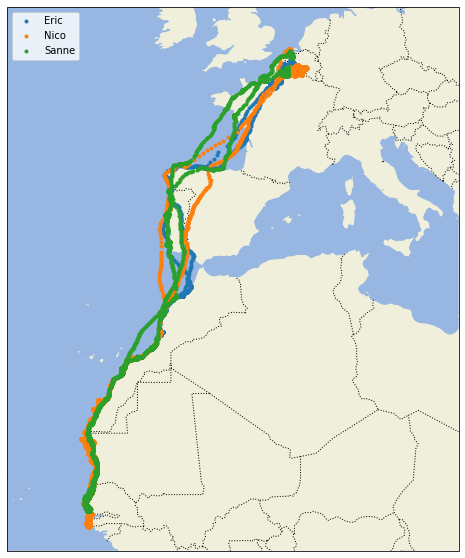

In [12]:
#Using the Cartopy Library
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in birds_name:
    ix = birds_data["bird_name"] == name
    x, y = birds_data.longitude[ix], birds_data.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)

plt.legend(loc="upper left")
plt.show()